# Requirements

In this assignment, you will work with the California Housing dataset (we explored during Chapter 2 Labs) to explore unsupervised learning techniques using K-Means clustering. Your task is to apply K-Means clustering, evaluate the results, and perform a comparative analysis with different cluster configurations. You will also analyze how the clustering results can be used to segment housing data for further insights.

- Apply K-Means Clustering on the California Housing Dataset based on longitude, latitude and median_income

- Optimize the Number of Clusters Using Silhouette Score: Calculate the silhouette score for different cluster configurations to evaluate the quality of clustering.

- Analyze the Clustering Results

  - Visualize the clusters using scatter plots and compare the results for different values of k.
  - Discuss the distribution of data points in each cluster and their corresponding housing features (e.g., median income).
  - Interpret the results and explain how the clusters represent different segments of the housing market.
- Comparison with Other Clustering Algorithms
  - Compare K-Means with another clustering algorithm, such as DBSCAN (or choose any other you want to choose), and discuss which performs better.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

import util as utl

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "report"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

util loaded


# Load data

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)

In [83]:
housing.data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [82]:
housing.data.iloc[:,1]

0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: HouseAge, Length: 20640, dtype: float64

In [4]:
housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [5]:
medinc = 'MedInc'
lat = 'Latitude'
lon = 'Longitude'

X = housing.data[[medinc,lat,lon]]

X

MedInc  Latitude  Longitude
0      8.3252     37.88    -122.23
1      8.3014     37.86    -122.22
2      7.2574     37.85    -122.24
3      5.6431     37.85    -122.25
4      3.8462     37.85    -122.25
...       ...       ...        ...
20635  1.5603     39.48    -121.09
20636  2.5568     39.49    -121.21
20637  1.7000     39.43    -121.22
20638  1.8672     39.43    -121.32
20639  2.3886     39.37    -121.24

[20640 rows x 3 columns]

In [6]:
max(X[medinc])

15.0001

In [7]:
y = housing.target

y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [8]:
max(y)

5.00001

# Data visualize

Saving figure median_income_by_location_3d


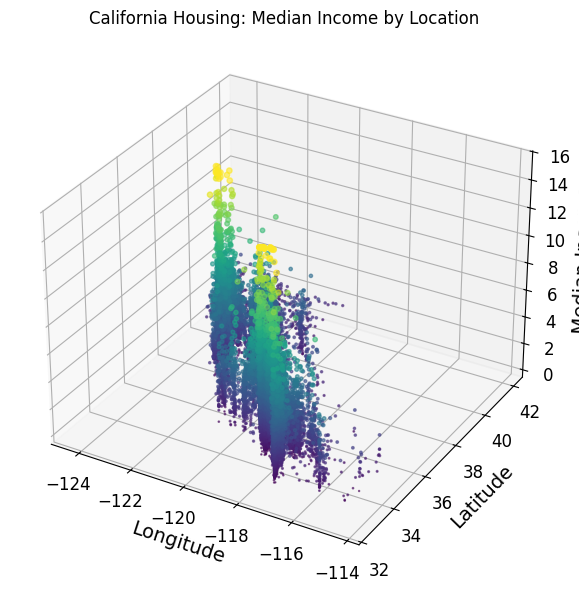

In [9]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[lon], X[lat], X[medinc],
           c=X[medinc], s=X[medinc], cmap='viridis', alpha=0.6)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Median Income')
plt.title('California Housing: Median Income by Location')

save_fig('median_income_by_location_3d')

Saving figure median_income_by_location_2d


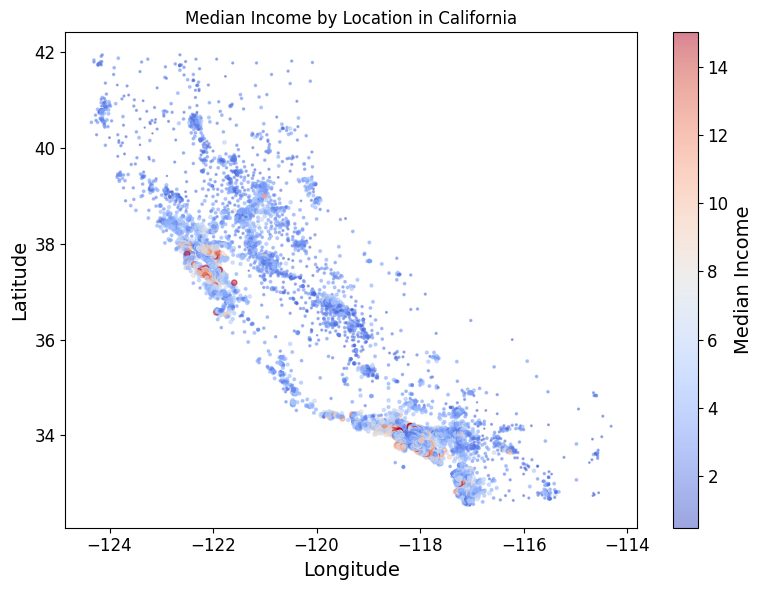

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X[lon], X[lat], 
            c=X[medinc], s=X[medinc], cmap='coolwarm', alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Median Income by Location in California")
cbar = plt.colorbar()
cbar.set_label("Median Income")
save_fig('median_income_by_location_2d')
plt.show()


Saving figure median_income_by_location_hexbin


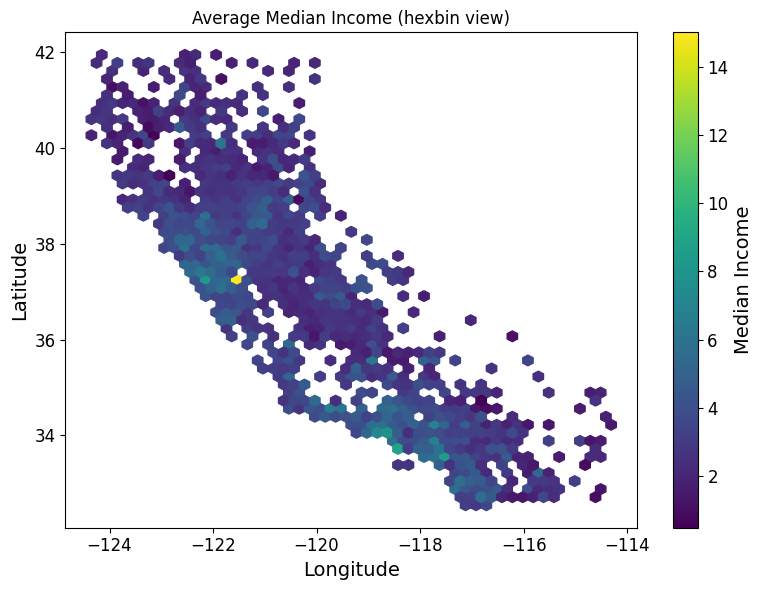

In [11]:
plt.figure(figsize=(8, 6))
plt.hexbin(X[lon], X[lat], 
            C=X[medinc], reduce_C_function=np.mean, gridsize=50, cmap='viridis')
plt.colorbar(label='Median Income')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Average Median Income (hexbin view)')
save_fig('median_income_by_location_hexbin')
plt.show()


Saving figure housing_price_distribution


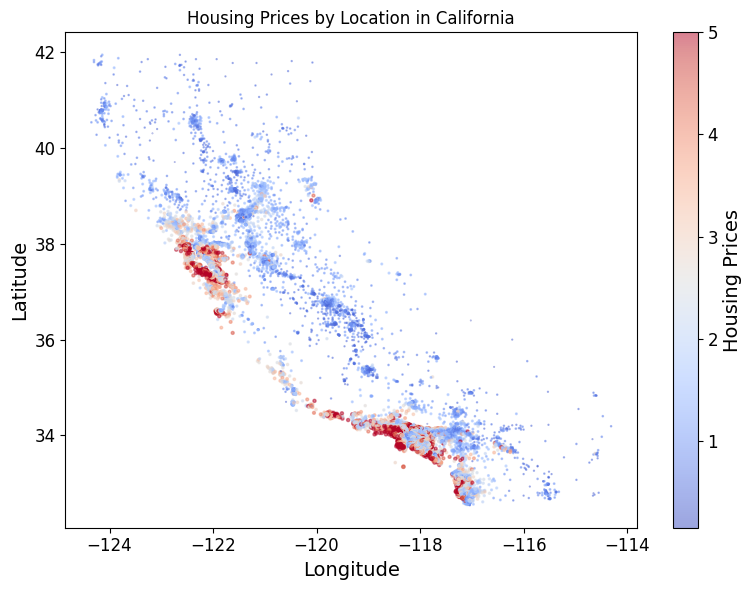

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(X[lon], X[lat], 
            c=y, s=y, cmap='coolwarm', alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Housing Prices by Location in California")
cbar = plt.colorbar()
cbar.set_label("Housing Prices")
save_fig('housing_price_distribution')
plt.show()


Saving figure median_income_distribution


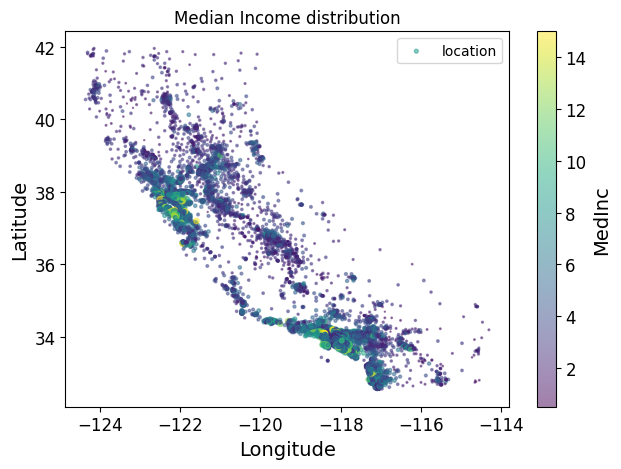

In [37]:
X.plot.scatter(x=lon, y=lat, alpha=0.5, label='location', s=medinc, c=medinc, colorbar=True, title='Median Income distribution')

plt.legend()

save_fig('median_income_distribution')

Saving figure dataset_on_real_world_map


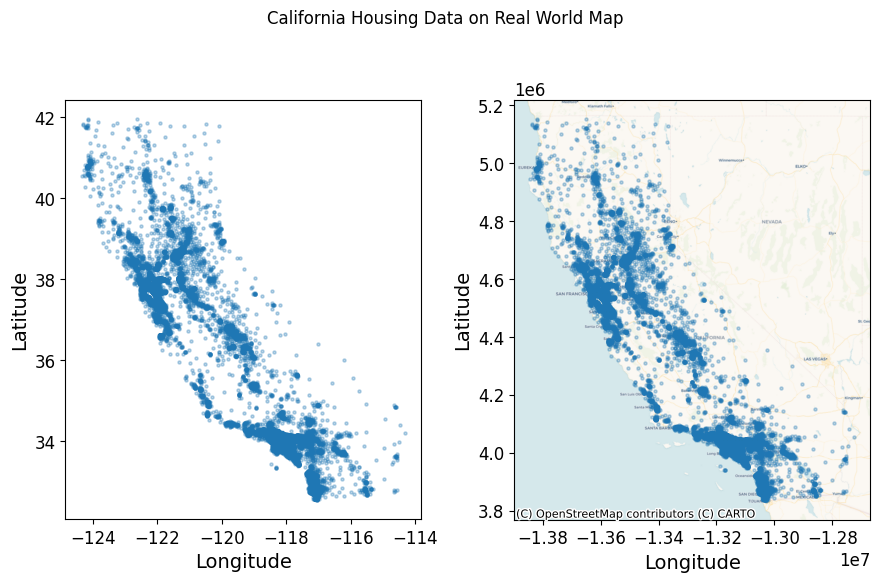

In [69]:
import geopandas as gpd
import contextily as ctx

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    X,
    geometry=gpd.points_from_xy(X[lon], X[lat]),
    crs="EPSG:4326"  # WGS84, standard lat/lon system
)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 6))
fig.suptitle('California Housing Data on Real World Map')

gdf.plot(ax=ax1, alpha=0.3, markersize=5)
ax1.set_xlabel(lon)
ax1.set_ylabel(lat)


gdf_web = gdf.to_crs(epsg=3857)
ax = gdf_web.plot(ax=ax2, alpha=0.3, markersize=5)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)
ax2.set_xlabel(lon)
ax2.set_ylabel(lat)
save_fig('dataset_on_real_world_map')
plt.show()

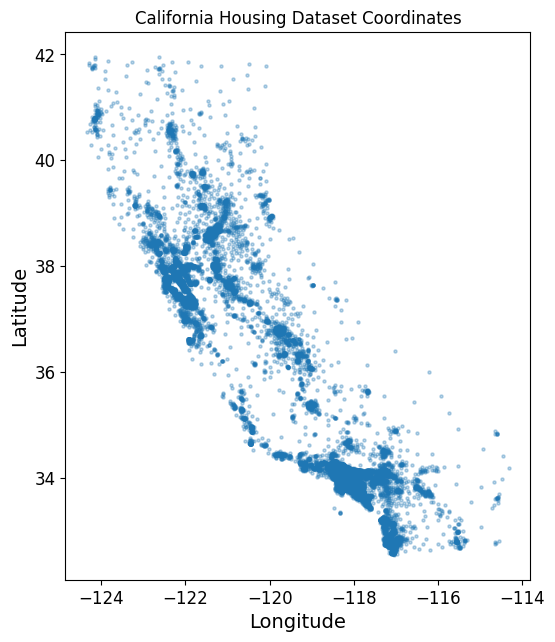

In [53]:
import geopandas as gpd

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    X,
    geometry=gpd.points_from_xy(X[lon], X[lat]),
    crs="EPSG:4326"  # WGS84, standard lat/lon system
)

# Plot on world map
gdf.plot(figsize=(6, 8), alpha=0.3, markersize=5)
plt.title("California Housing Dataset Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

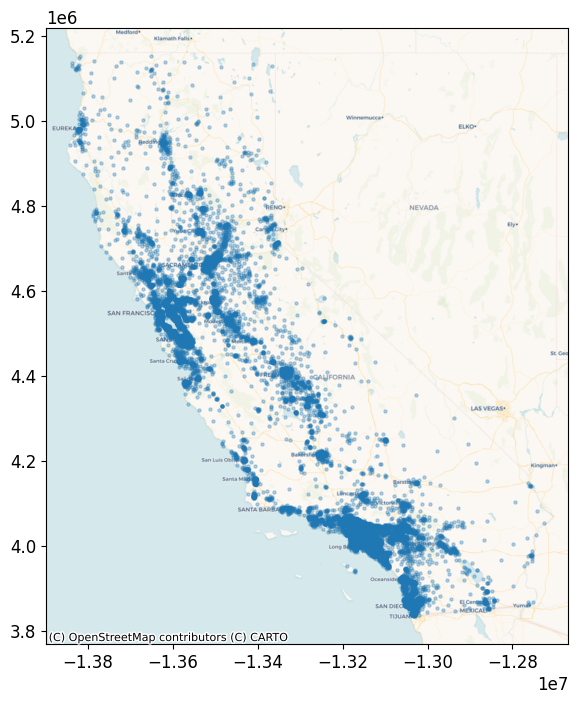

In [107]:
import contextily as ctx

gdf_web = gdf.to_crs(epsg=3857)
ax = gdf_web.plot(figsize=(8,8), alpha=0.3, markersize=5)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)
plt.show()

# KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=42)

y_pred = km.fit_predict(X)

In [15]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(20640,), dtype=int32)

In [16]:
km.cluster_centers_

array([[   3.92219439,   33.93969106, -118.0072438 ],
       [   3.79990337,   37.95606601, -121.71575207]])

In [17]:
km.labels_

array([1, 1, 1, ..., 1, 1, 1], shape=(20640,), dtype=int32)

In [18]:
from pandas import DataFrame

X_new = DataFrame(data={medinc:[50], lat:[33], lon:[-125]})

print(X_new)

km.predict(X_new)

   MedInc  Latitude  Longitude
0      50        33       -125


array([1], dtype=int32)

In [84]:
housing.data["Cluster"] = km.labels_

In [85]:
housing.data.groupby("Cluster")[[medinc, "HouseAge", "AveRooms"]].mean()

MedInc   HouseAge  AveRooms
Cluster                               
0        3.922258  28.439337  5.243363
1        3.799830  28.914338  5.683923

# Decision Boundaries

Saving figure decision_boundary_km_2_centroids


/home/vinh/hv/iai600/assignments/6/repo/dev/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


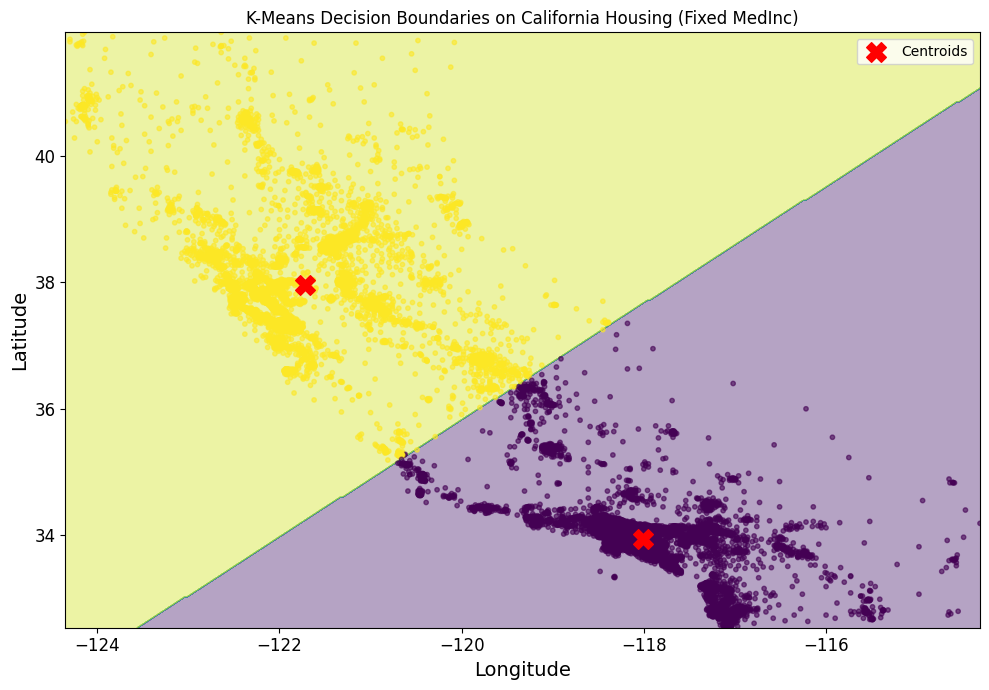

In [19]:
x_min, x_max = X[lon].min(), X[lon].max()
y_min, y_max = X[lat].min(), X[lat].max()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400), np.linspace(y_min, y_max, 400))

medinc_fixed = np.full(xx.shape, X[medinc].mean())

grid_points = np.c_[medinc_fixed.ravel(), yy.ravel(), xx.ravel()]

Z = km.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.4)  # decision regions

plt.scatter(X[lon], X[lat], c=y_pred, cmap='viridis', s=10, alpha=0.6)
plt.scatter(km.cluster_centers_[:, 2],  # Longitude
            km.cluster_centers_[:, 1],  # Latitude
            c='red', marker='X', s=200, label='Centroids')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Decision Boundaries on California Housing (Fixed MedInc)')
plt.legend()
save_fig('decision_boundary_km_2_centroids')
plt.show()

# Dimensionality Reduction

In [20]:
from sklearn.decomposition import PCA

X_pca = PCA(n_components=2).fit_transform(X)

km2 = KMeans(n_clusters=3, random_state=42)

km2.fit_predict(X_pca)

array([1, 1, 1, ..., 1, 1, 1], shape=(20640,), dtype=int32)

In [21]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure test


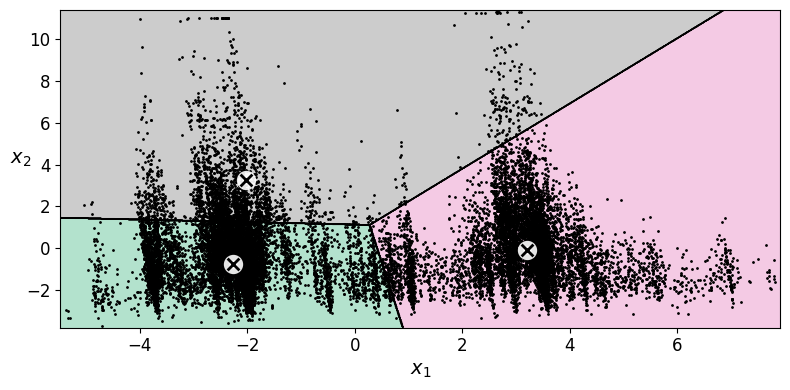

In [22]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(km2, X_pca)
save_fig("test")
plt.show()

# Optimize using Silhouette score

In [23]:
km.inertia_

101042.11855364997

In [24]:
from sklearn.metrics import silhouette_score

silhouette_score(X, km.labels_)

0.5665094919763821

In [25]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 7)]
inertias = [model.inertia_ for model in kmeans_per_k]

Saving figure inertia_vs_k


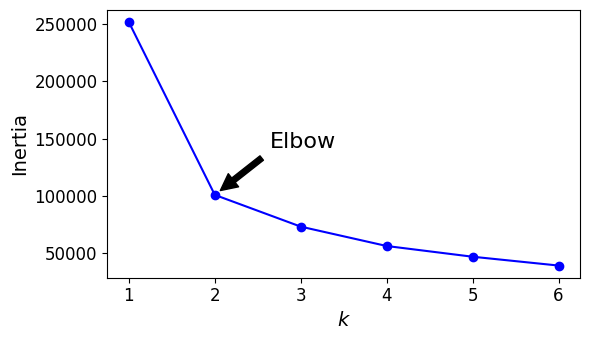

In [26]:
plt.figure(figsize=(6, 3.5))
plt.plot(range(1, 7), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.45, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
save_fig("inertia_vs_k")
plt.show()

In [27]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

Saving figure silhouette_score_vs_k


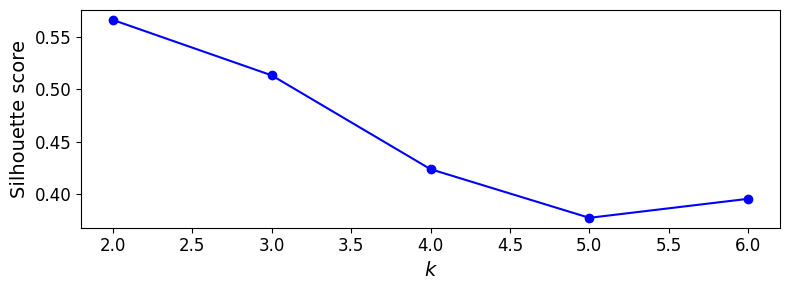

In [28]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 7), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k")
plt.show()

Saving figure silhouette_analysis


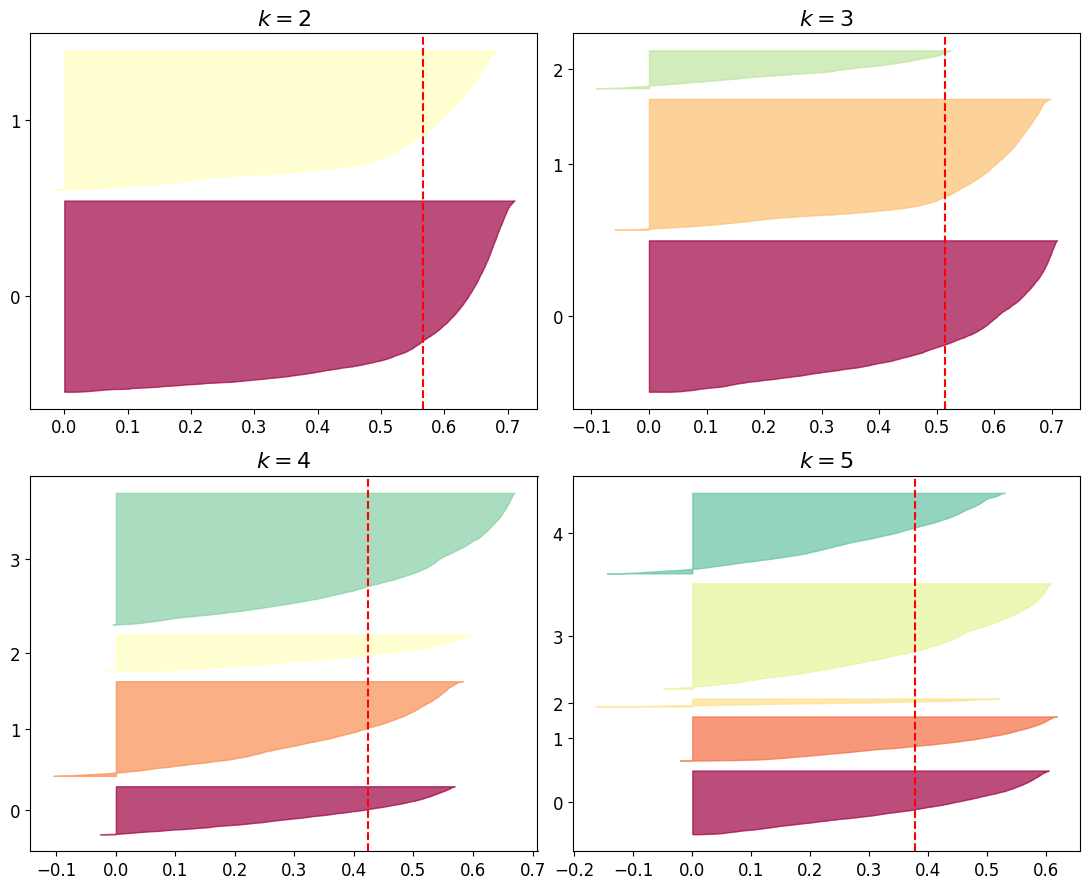

In [29]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (2,3,4,5):
    plt.subplot(2, 2, k-1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    # if k in (3, 5):
    #     plt.ylabel("Cluster")
    
    # if k in (5, 6):
    #     plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    #     plt.xlabel("Silhouette Coefficient")
    # else:
    #     plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k-2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5665094919763821
For n_clusters = 3 The average silhouette_score is : 0.5134953776441145
For n_clusters = 4 The average silhouette_score is : 0.42378381535595633
For n_clusters = 5 The average silhouette_score is : 0.3772622328439901
For n_clusters = 6 The average silhouette_score is : 0.3954599683853829
Saving figure silhouette_analysis


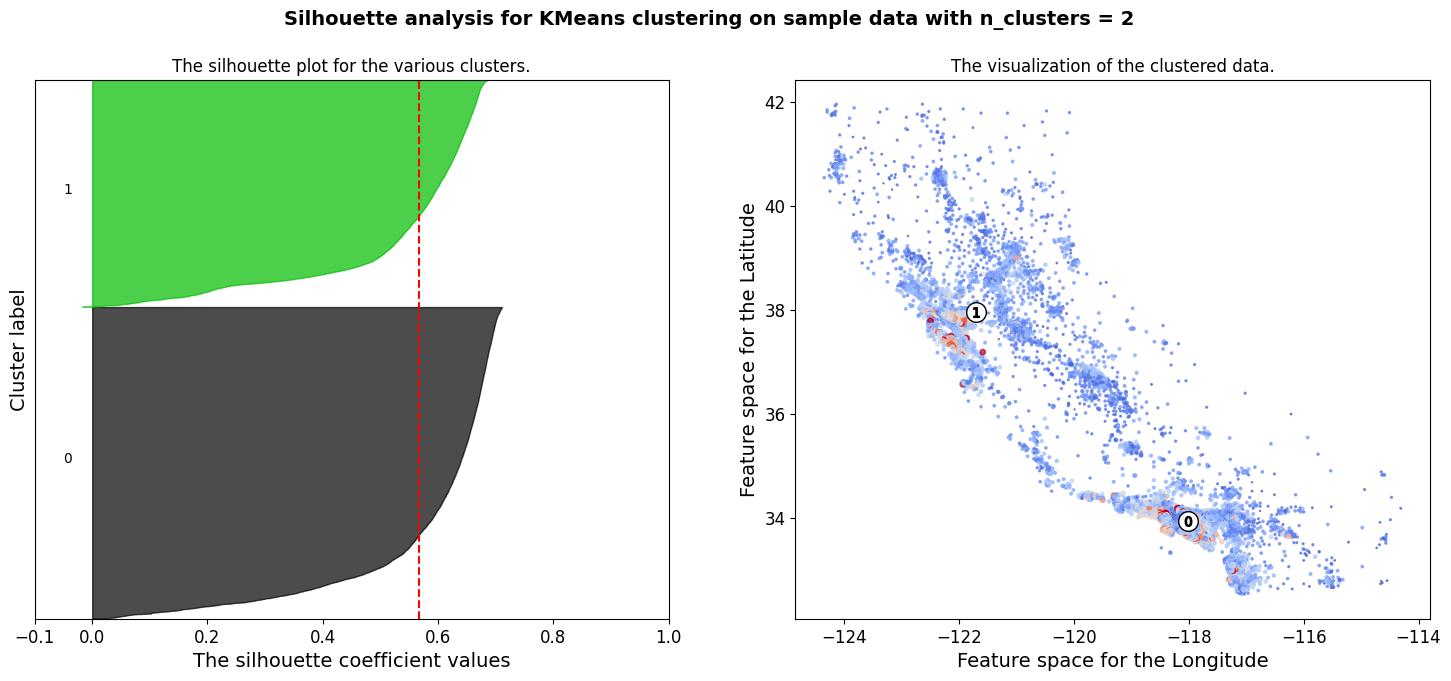

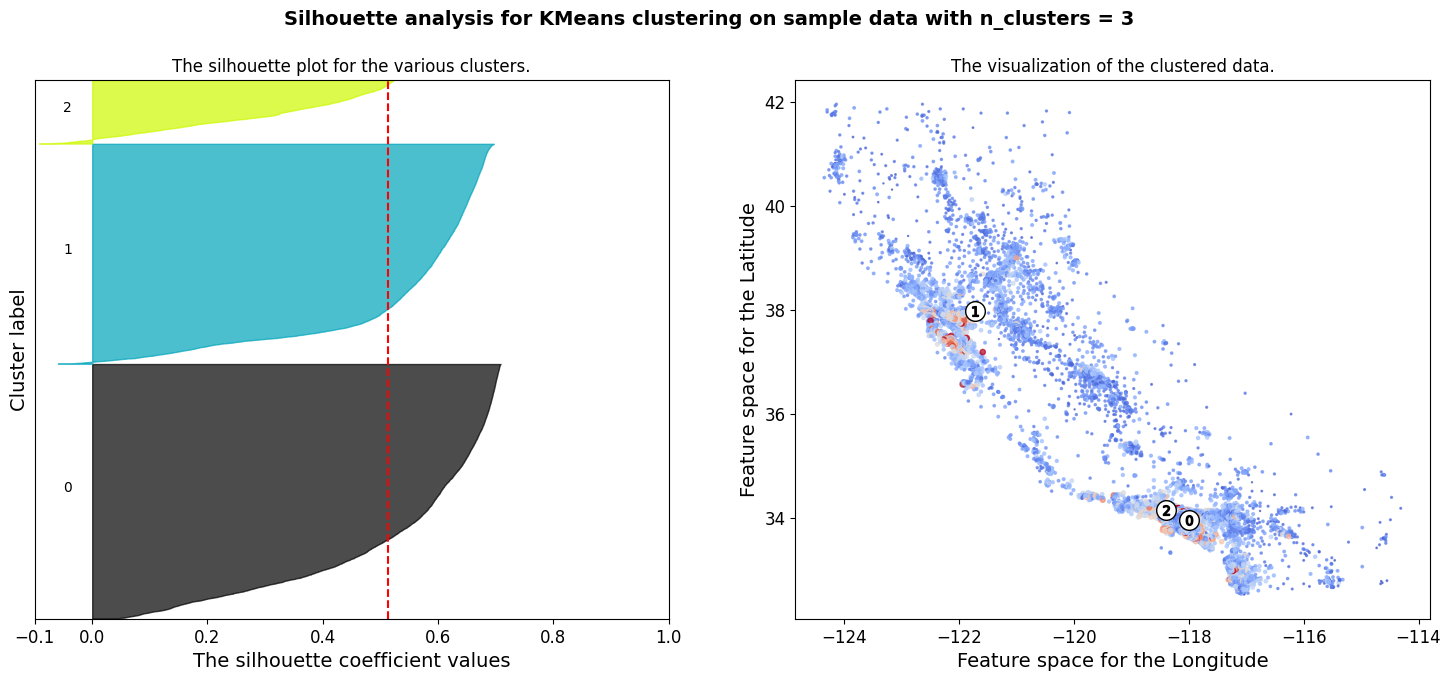

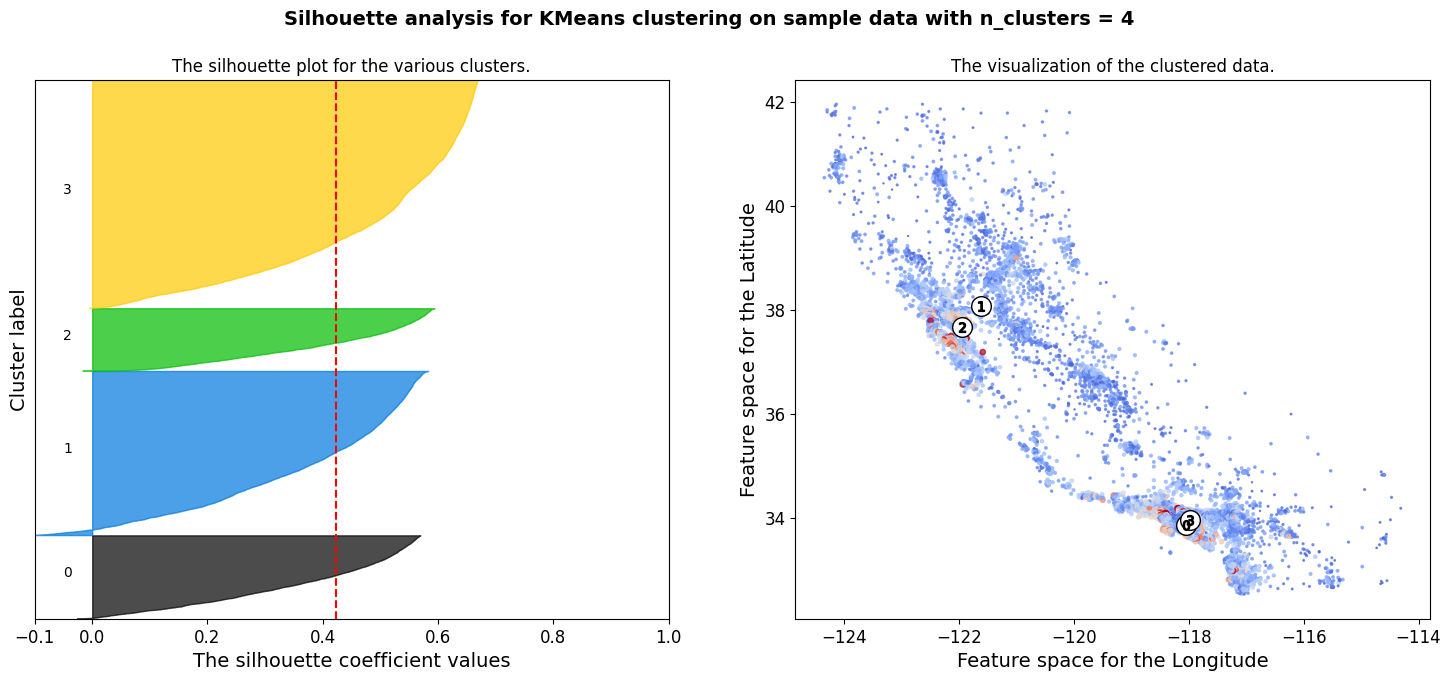

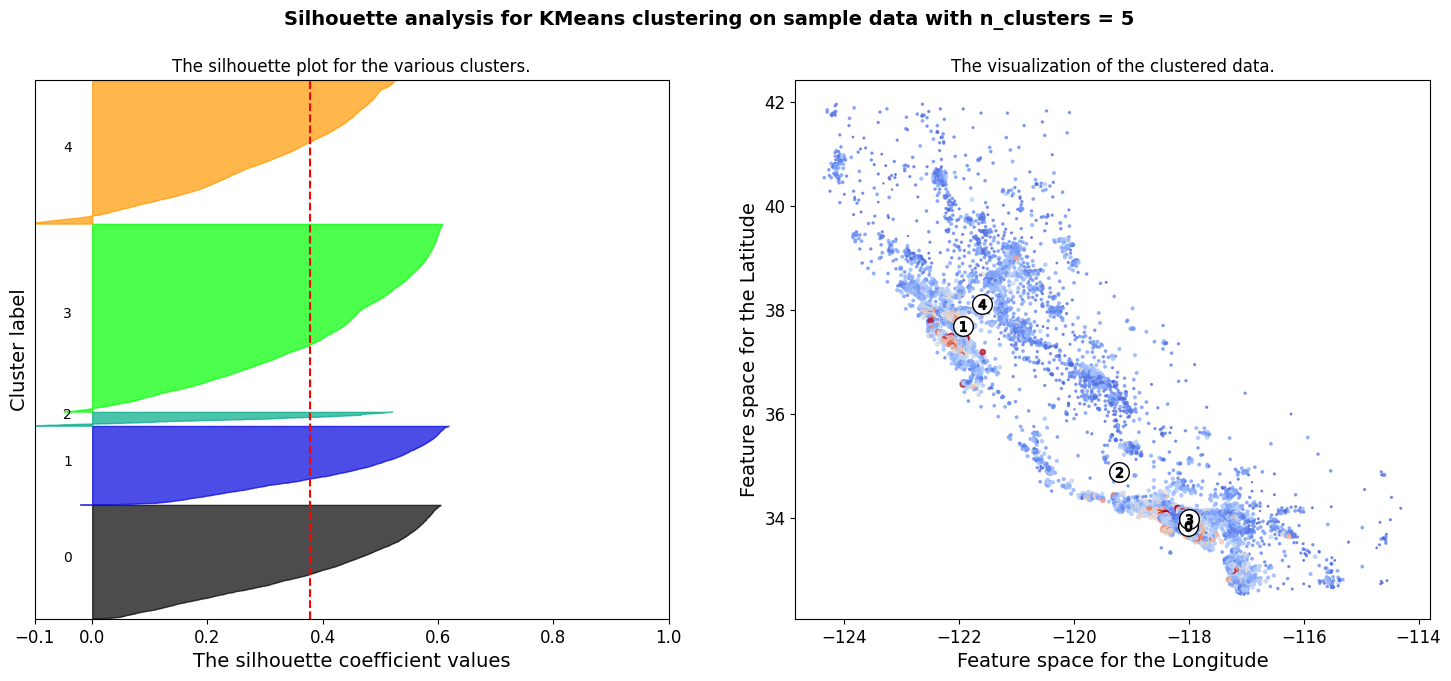

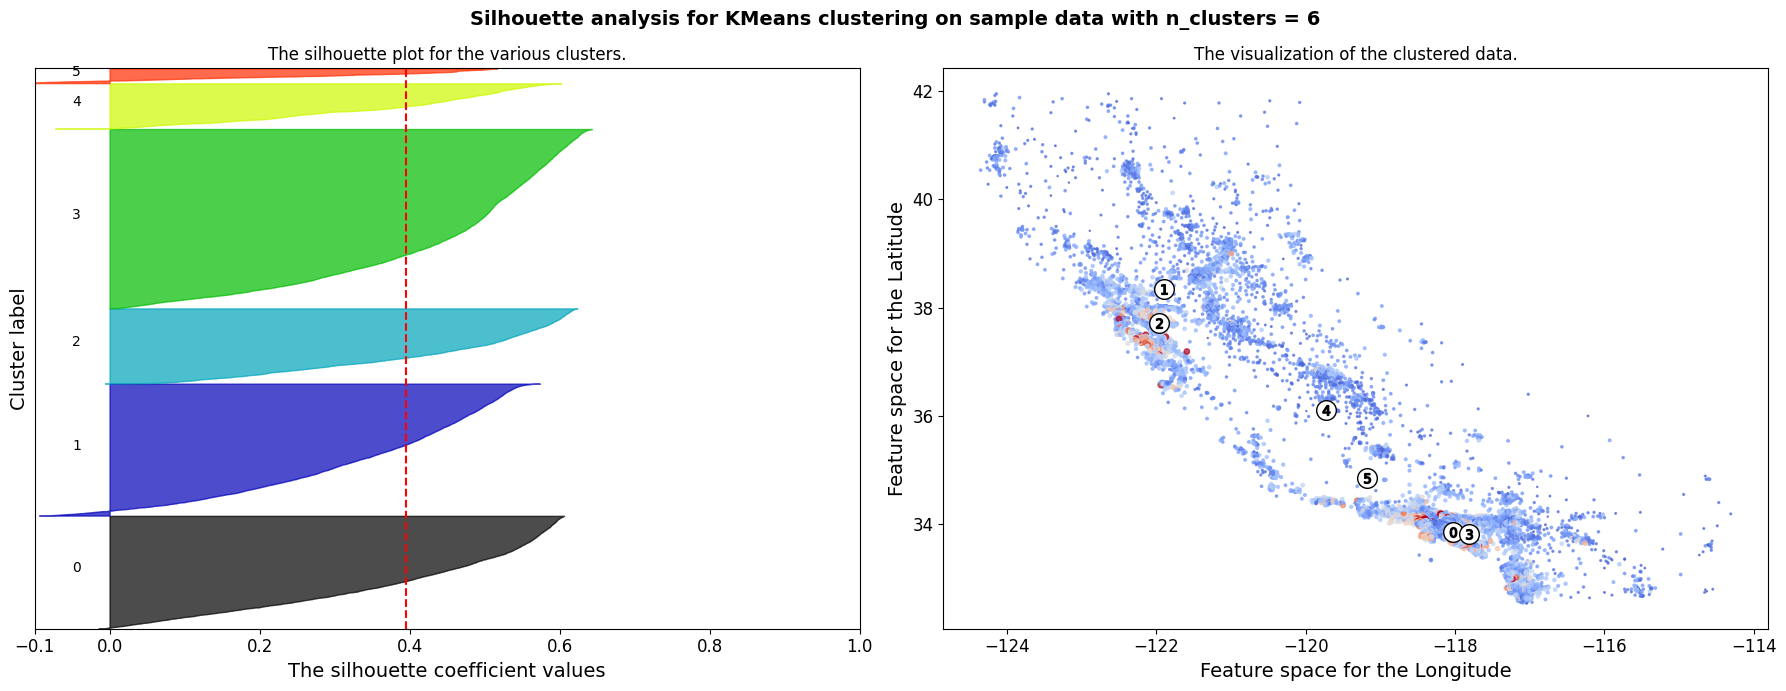

In [30]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# # Generating the sample data from make_blobs
# # This particular setting has one distinct cluster and 3 clusters placed close
# # together.
# X, y = make_blobs(
#     n_samples=500,
#     n_features=2,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # ax2.scatter(
    #     X[lon], X[lat], marker=".", s=X[medinc], lw=0, alpha=0.7, c=colors, edgecolor="k"
    # )

    ax2.scatter(
        X[lon], X[lat], s=X[medinc], alpha=0.7, c=X[medinc], cmap='coolwarm'
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 2],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[2], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the Longitude")
    ax2.set_ylabel("Feature space for the Latitude")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

save_fig("silhouette_analysis")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4513863515051951
For n_clusters = 3 The average silhouette_score is : 0.6655256914910949
For n_clusters = 4 The average silhouette_score is : 0.746313482667711
For n_clusters = 5 The average silhouette_score is : 0.5946473026637432
For n_clusters = 6 The average silhouette_score is : 0.46974788872174866


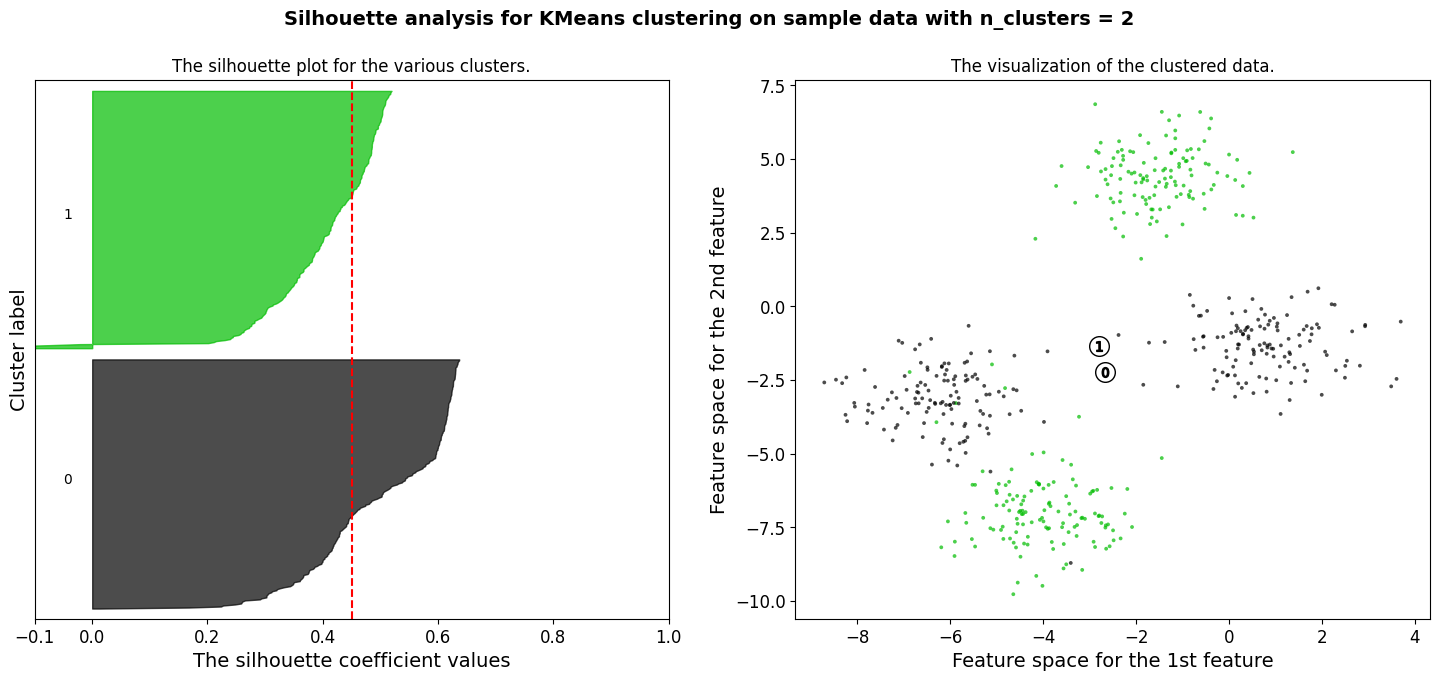

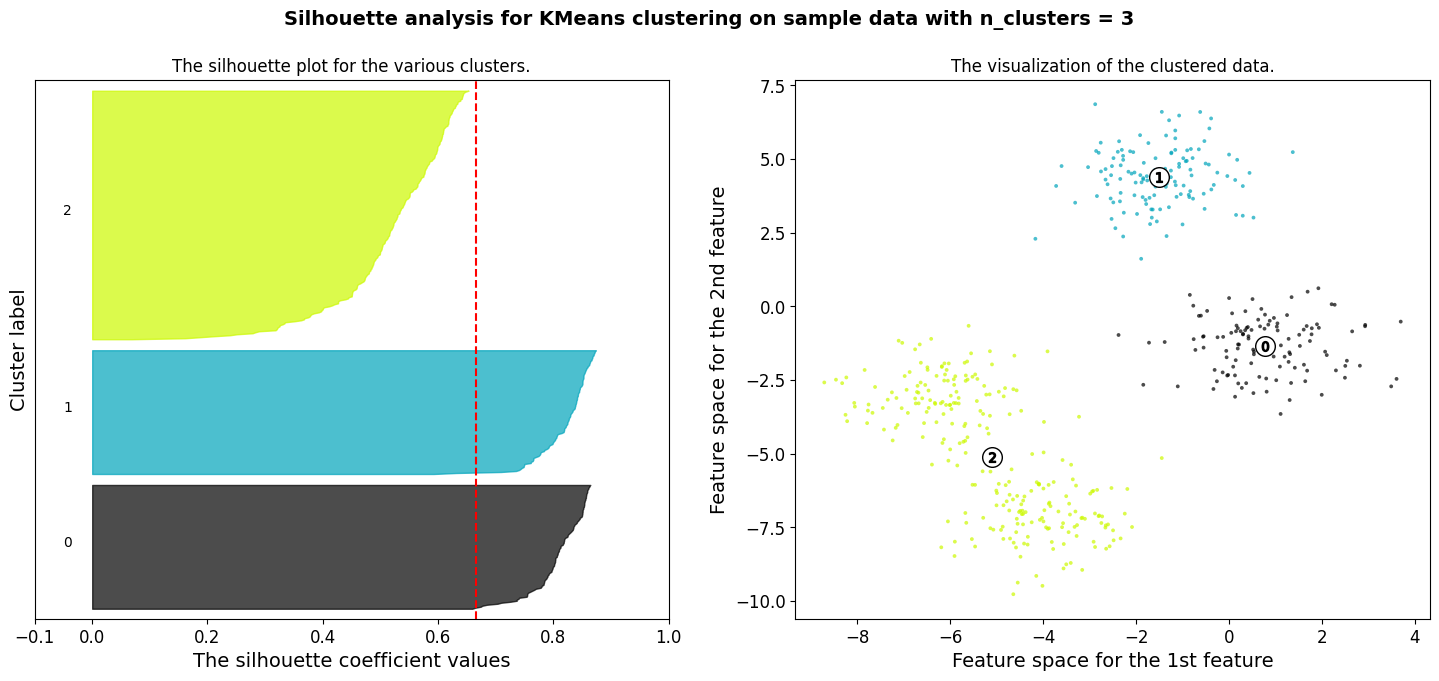

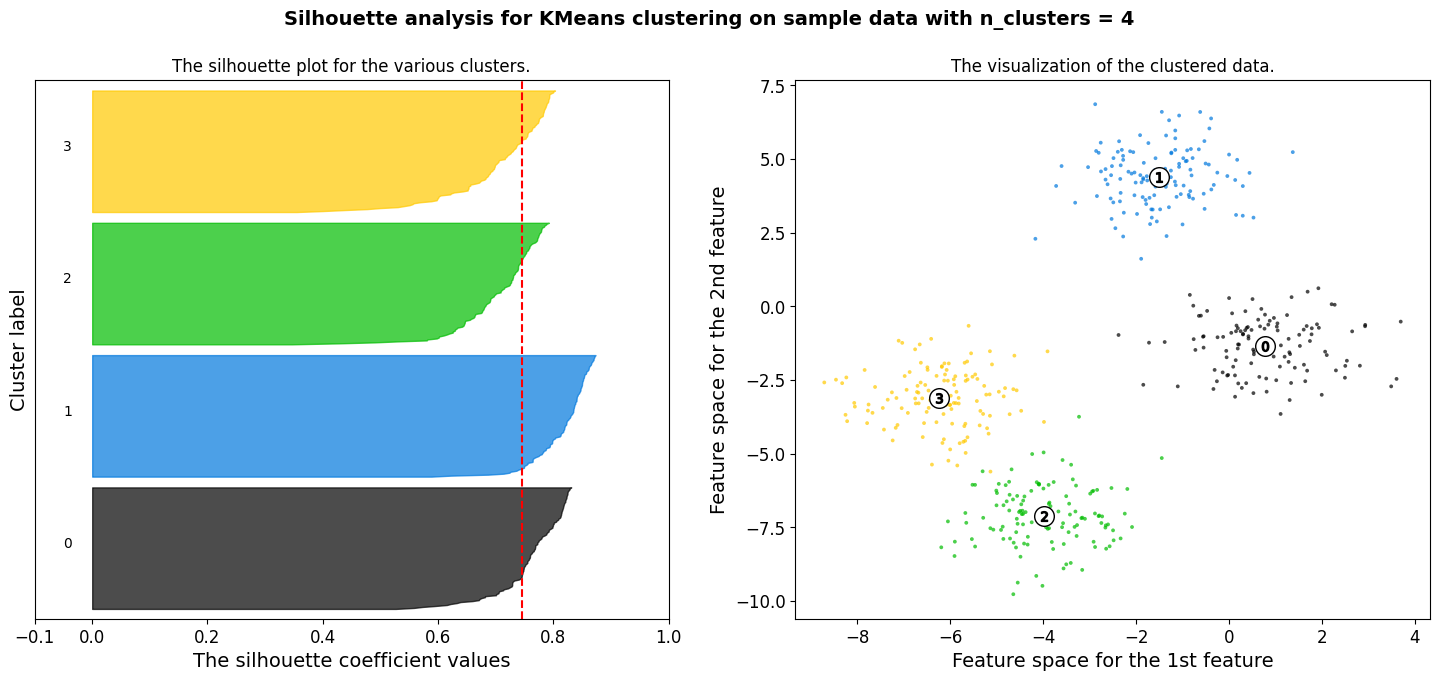

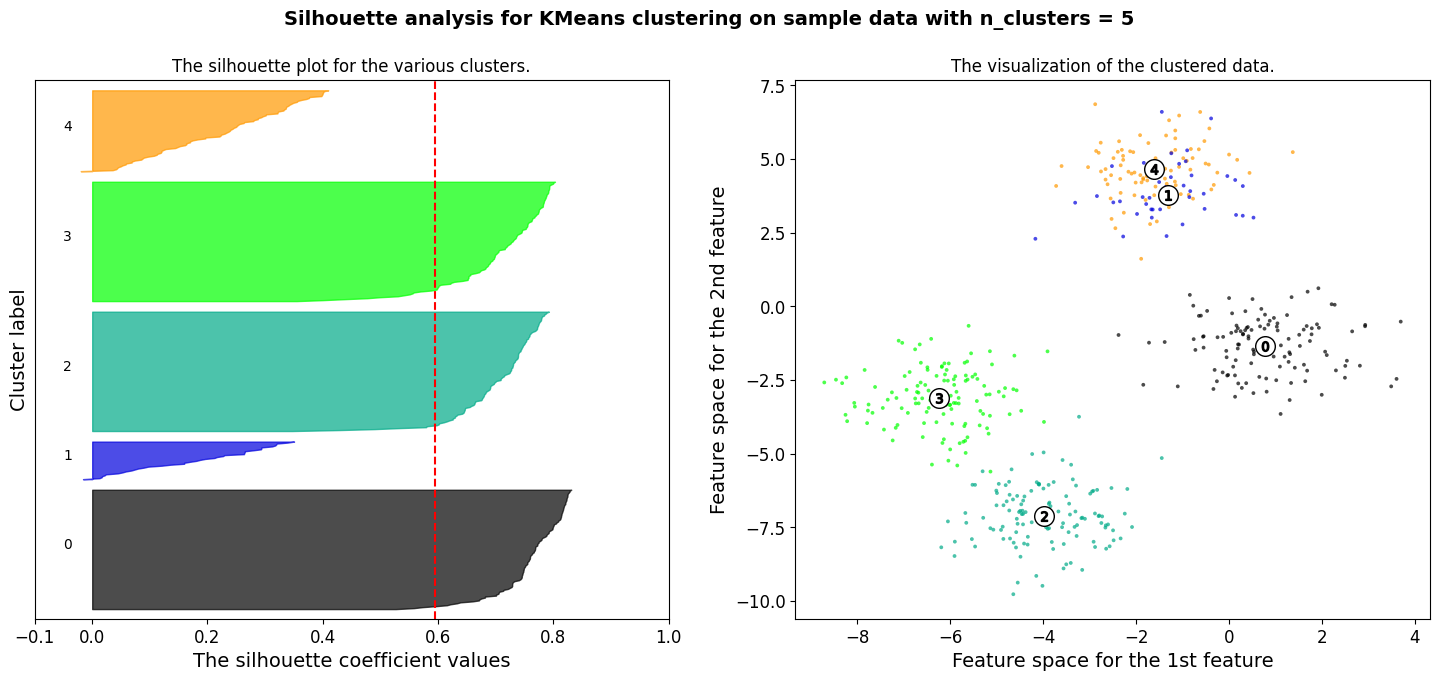

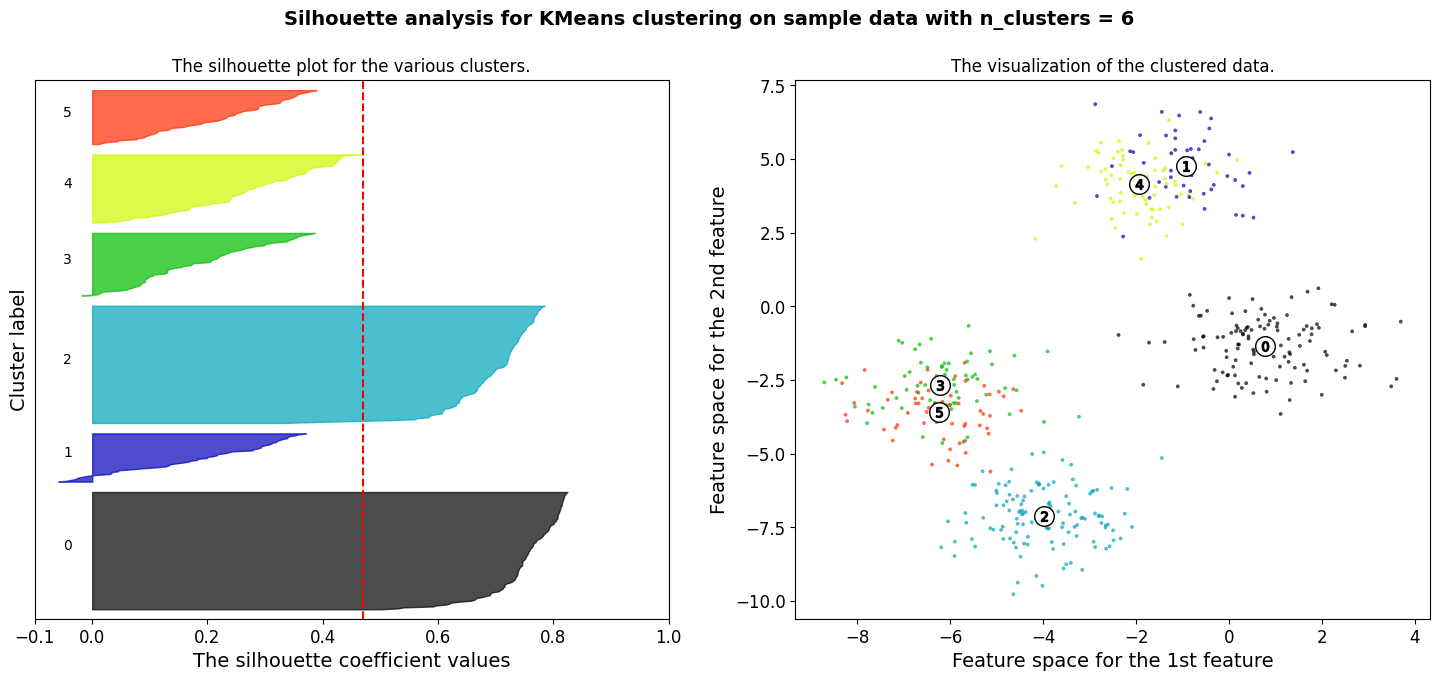

In [31]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
Xt, yt = make_blobs(
    n_samples=500,
    n_features=3,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Xt) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Xt)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Xt, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Xt, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        Xt[:, 0], Xt[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Find the optimal K

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Saving figure scaled_inertia_vs_k


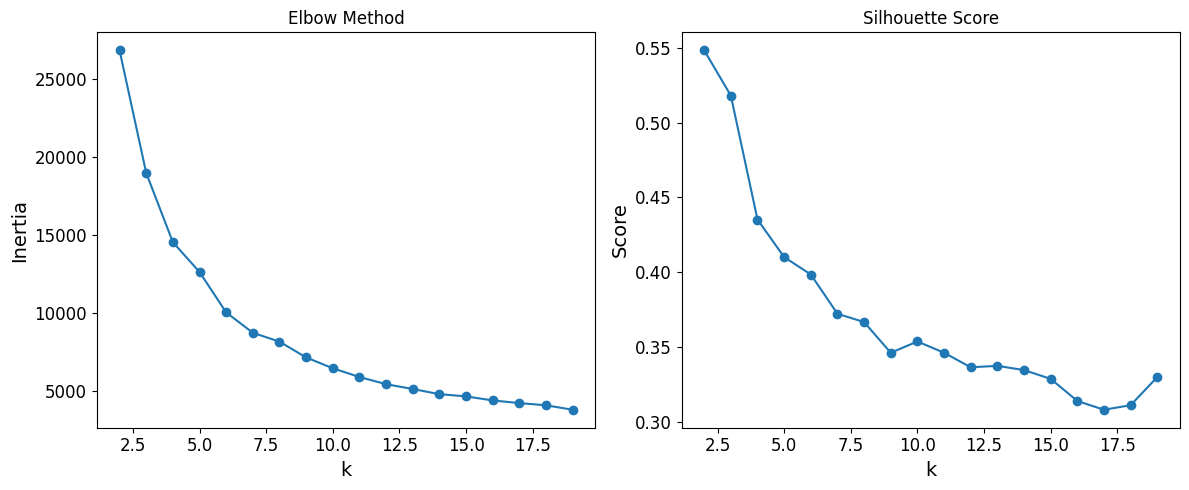

In [105]:
inertias = []
sil_scores = []

rng = range(2,20)

for k in rng:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(rng, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(rng, sil_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("k")
plt.ylabel("Score")
save_fig("scaled_inertia_vs_k")
plt.show()

In [100]:
kmeans = KMeans(n_clusters=10, random_state=42)
housing.data["Cluster"] = kmeans.fit_predict(X_scaled)

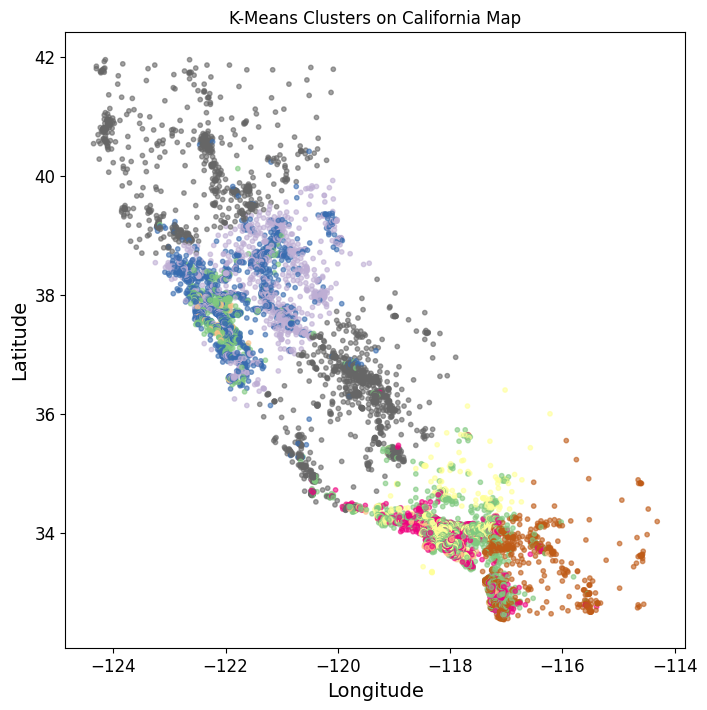

In [101]:
plt.figure(figsize=(8, 8))
plt.scatter(housing.data["Longitude"], housing.data["Latitude"], c=housing.data["Cluster"], cmap="Accent", s=10, alpha=0.6)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("K-Means Clusters on California Map")
plt.show()

In [102]:
summary = housing.data.groupby("Cluster")[["MedInc", "HouseAge", "AveRooms", "AveOccup"]].mean()
summary["Count"] = housing.data["Cluster"].value_counts().sort_index()
summary

MedInc   HouseAge  AveRooms  AveOccup  Count
Cluster                                                 
0         4.394111  28.186941  5.500240  2.970133   4135
1         7.220570  26.592202  6.905732  4.380923    949
2         2.561764  31.916883  5.084930  2.762032   3080
3        11.906110  28.588448  8.203039  2.972992    277
4         2.511598  32.490458  4.193791  3.302044   3825
5         4.487828  28.607214  5.838769  2.975166   3022
6         6.718016  24.487385  6.784594  2.928679   1625
7         2.632366  23.846424  5.132352  2.790839   1426
8         2.383664  24.910622  5.841957  2.623624    772
9         2.616521  25.737083  5.417917  3.416092   1529

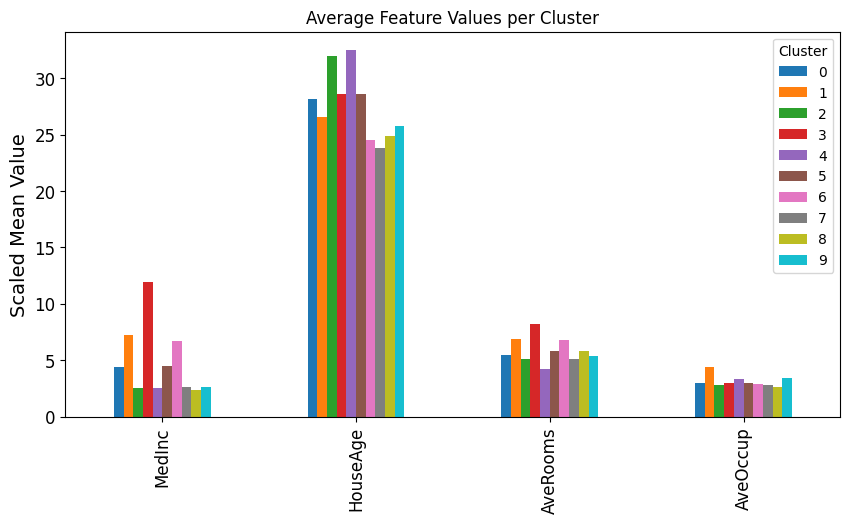

In [103]:
summary.drop(columns="Count").T.plot(kind="bar", figsize=(10,5))
plt.title("Average Feature Values per Cluster")
plt.ylabel("Scaled Mean Value")
plt.show()